Import library

In [9]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


Load dataset

link: https://archive.ics.uci.edu/dataset/222/bank+marketing
*italicized text*

In [10]:
df = pd.read_csv('/content/drive/MyDrive/HACKTIV8/Tugas 3/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


pisahkan fitur dan target:

- X = df.frop('y', axis=1) --> fitur (semua kolom kecuali target)
- y = df['y']  --> target kolom 'y'

fungsi:
- x berisi semua informasi klien (umur, pekerjaan, marital, dll.)
- y adalah label target: apakah klien men-subscribe deposito (yes/no)

In [11]:
X = df.drop('y', axis=1)
y = df['y']

Preprocessing untuk ubah kolom kategorikal menjadi numerik dan mengubah 'yes' menjadi 1 dan 'no' menjadi 0

- get_dummies(): mengubah kolom teks (job, marital, dll) menjadi angka biner
- LabelEncoder: mengubah kolom target dari string ("yes", "no") ke angka (1, 0)

In [12]:
X_encoded = pd.get_dummies(X)
le = LabelEncoder()
y_encoded = le.fit_transform(y)   # yes = 1, no = 0

Split dataset training dan testing:
- membagi dataset menjadi:
75% untuk training dan 25% untuk testing

In [13]:
# split data train and test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, random_state=42)

Melatih Model Random Forest:
- n_estimators=100  --> 100 pohon keputusan
- max_depth=10 --> kedalaman maksimum level 10 untuk mencegah overfitting

In [14]:
# Buat dan latih model Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

Melakukan prediksi dan evaluasi akurasi dan laporan:
- Menggunakan model yang sudah dilatih untuk memprediksi apakah klien y=yes atau no pada uji X_test

Evaluasi akurasi dan laporan:
- accuracy_score: presentase prediksi yang benar
- classification_report: precision, recall, f1-score
- confusion_matrix: menghitung prediksi benar dan salah untuk tiap kelas

Penjelasan terkait hasil:
- 9013: prediksi benar untuk tidak langganan
- 131: prediksi benar untuk langganan
- 807: salah prediksi (harusnya yes, dikira no)
- 346: salah prediksi (harusnya no, dikira yes

In [15]:
y_pred = rf.predict(X_test)

print("Akurasi: ", accuracy_score(y_test, y_pred))
print("\nClassification report: \n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

Akurasi:  0.9089055064581917

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      9144
           1       0.73      0.30      0.42      1153

    accuracy                           0.91     10297
   macro avg       0.82      0.64      0.69     10297
weighted avg       0.90      0.91      0.89     10297


Confusion Matrix :
 [[9013  131]
 [ 807  346]]


Visualisasi COnfusion Matrix:
- menampilkan confusion matrix dalam bentuk heatmap agar mudah dibaca
- annot=True: tampilkan angka dalam kotak
- xticklabels dan yticklabels: label kelas yang mudah dimengerti

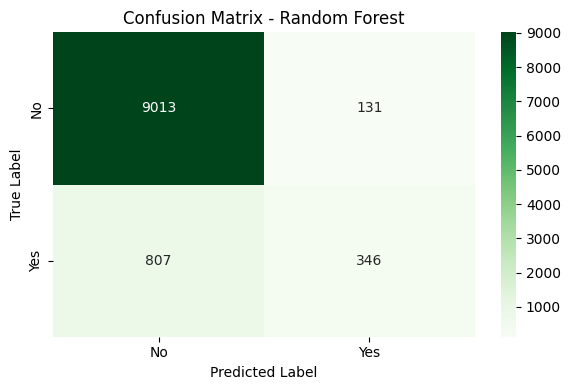

In [16]:
# confusion matrix

# menggunakan hasil prediksi dari model yang saya buat
cm = confusion_matrix(y_test, y_pred)
labels = ['No', 'Yes']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

Algoritma yang digunakan: Random Forest

Alasannya:
- Akurat
- cepat
- stabil
- bisa tangani kategorikal/numerik

Berikut adalah perbandingannya dengan algoritma lain:

1. Logistic regression: tidak cukup kuat untuk menangani hubungan non-linear dan data kompleks

2. KNN: Lemot untuk data besar, perlu standarisasi, sensitif ke skala fitur dan noise

3. SVM: boros memori di data besar, perlu preprocessing intensif

4. Neural Network (ANN): butuh banyak tuning, lambat, dan kurang interpretatif

5. Naive bayes (NB): Tidak cocok untuk data marketing yang kompleks

6. XGBoost: training sedikit lebih lambat dan setup lebih kompleks daripada Random Forest

7. LightGBM: perlu install tambahan dan kurang interpretatif serta lebih kompleks jika dibanding dengan Random Forest
